In [56]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import yfinance as yf

In [57]:
ticker = yf.Ticker("^REI")
df = ticker.history(period="2y", interval="4h")
print(df.shape)
df.head()

(999, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-04-05 09:30:00-04:00,369.160004,371.279999,368.470001,370.730011,0,0.0,0.0
2023-04-05 13:30:00-04:00,370.760010,370.779999,367.380005,367.869995,0,0.0,0.0
2023-04-06 09:30:00-04:00,369.429993,369.859985,366.100006,369.250000,0,0.0,0.0
2023-04-06 13:30:00-04:00,369.250000,370.410004,367.950012,370.410004,0,0.0,0.0
2023-04-10 09:30:00-04:00,368.440002,369.529999,366.579987,369.230011,0,0.0,0.0


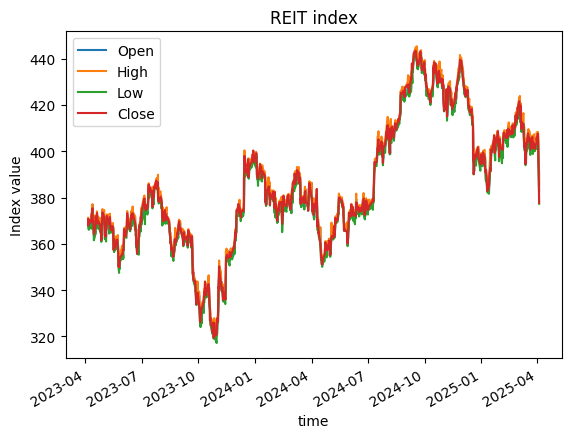

In [58]:
df[["Open", "High", "Low", "Close"]].plot(
    xlabel='time',
    ylabel='Index value',
    title='REIT index',
)
data = df["Open"]

Datetime
2023-04-05 09:30:00-04:00    369.160004
2023-04-05 13:30:00-04:00    370.760010
2023-04-06 09:30:00-04:00    369.429993
2023-04-06 13:30:00-04:00    369.250000
2023-04-10 09:30:00-04:00    368.440002
Name: Open, dtype: float64

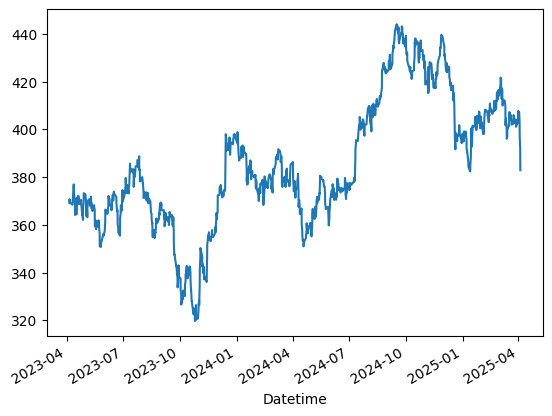

In [59]:
data.plot()
data.head()

In [60]:
adf_test = adfuller(data)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.643940
p-value: 0.460203


Wniosek: nie można założyć że dane są stacjonarne -> d > 0

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

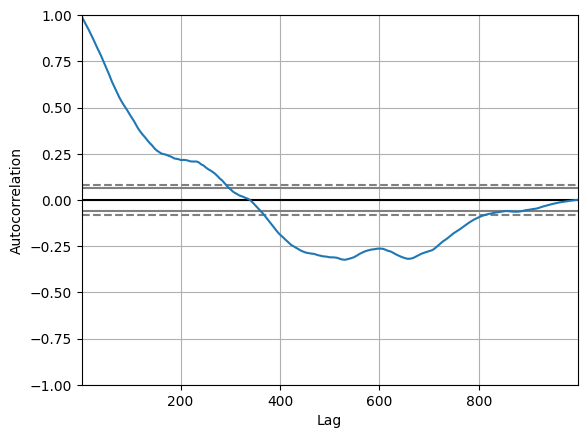

In [61]:
autocorrelation_plot(data)

Wniosek: p = ~20-60

## Rolling forecast

In [62]:
size = int(len(data) * 0.67)
train, test = data[:size], data[size:]

In [ ]:
from typing import Tuple

def fit_predict_ARIMA(n_steps_ahead: int, train: pd.Series, test: pd.Series, order: Tuple[int, int, int]) -> Tuple[pd.Series, pd.Series]:
    history = train.copy()
    predictions = []
    for t in range(0, len(test), n_steps_ahead):
        print(f"step={t//n_steps_ahead}/{len(test)//n_steps_ahead}")
        model = ARIMA(list(history), order=order)
        model_fit = model.fit()
        remaining = len(test) - t
        if remaining < n_steps_ahead:
            n_steps_ahead = remaining
        yhat = model_fit.forecast(steps=n_steps_ahead)
        predictions.extend(yhat)
        obs = test[t : t + n_steps_ahead]
        history = pd.concat([history, obs])

    predictions = pd.Series(predictions, index=test.index[:len(predictions)])
    return predictions, history

In [67]:
def evaluate_ARIMA(predictions, test):
    return mean_absolute_percentage_error(test, predictions)


def plot_ARIMA(predictions, history, n_steps_ahead):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    plt.title("ARIMA Forecast")
    plt.xlabel("time")
    plt.ylabel("Index value")
    history.plot(color="g", label="true")
    plt.vlines(
        x=predictions.index[0::n_steps_ahead],
        ymin=min(history.min(), predictions.min()),
        ymax=max(history.max(), predictions.max()),
        linestyles="dashed",
    )
    predictions.plot(color="r", label="pred")
    plt.legend()
    plt.show()

In [65]:
predictions, history = fit_predict_ARIMA(6*7, train, test, (25, 2, 4)) # tydzień naprzód
evaluate_ARIMA(predictions, test)

step=0/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=1/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=2/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=3/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=4/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=5/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=6/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


step=7/7


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.018414749695949032

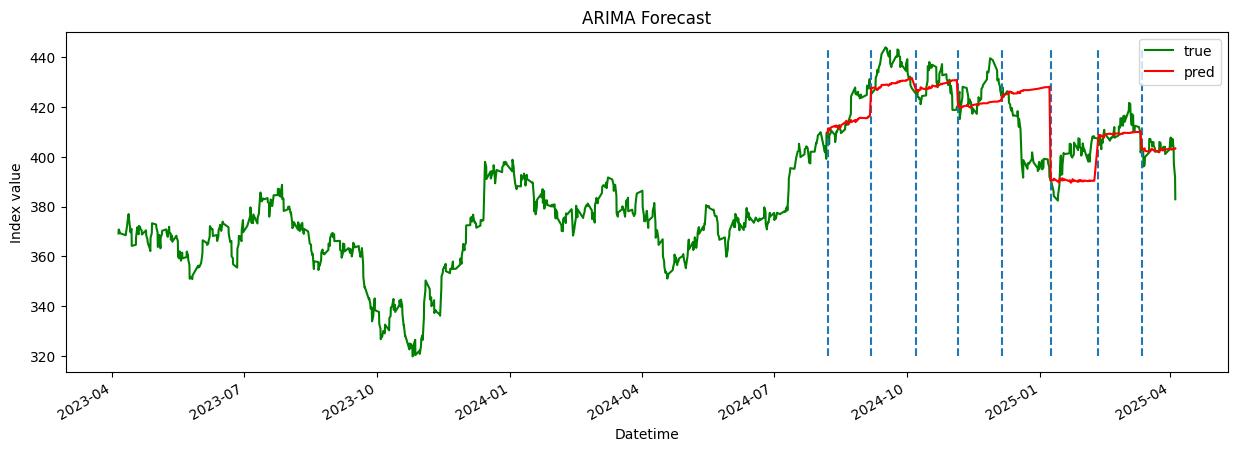

In [68]:
plot_ARIMA(predictions, history, 6*7)